# Capítulo 7

# Parte 4

Assista um vídeo explicando a utilização do DCT em imagens JPG [aqui](https://youtu.be/Q2aEzeMDHMA?si=iNKBuIxknRGZ0xVH)

*Objetivo: entender o que é uma transformada*

Neste curso, já fizemos várias transformações lineares. Por exemplo, quando temos vários vetores-coluna colocados numa matriz $x$, podemos aplicar uma transformação $A$ fazendo:

$y=Ax$

Nesse caso, $y$ tem vetores correspondentes aos vetores que compõem $x$, mas transformados para um outro espaço vetorial. Um exemplo disso é quando $x$ descreve compras em termos de brigadeiros e coxinhas, e $y$ descreve essas mesmas compras, mas em termos de "pacote 1" e "pacote 2".

Existem algumas transformações que são bastante especiais porque representam mudanças de base bastante conhecidas. Um exemplo delas é a matriz que transforma pixels RGB para YIQ. Outro exemplo é a transformada discreta de cossenos (DCT).

A DCT é uma transformada que é bastante usada em compressão de imagens, em especial no formato JPG. A DCT transforma uma matriz de pixels em uma matriz de frequências de cossenos.

A função cosseno é uma função que oscila entre -1 e 1, como mostrado abaixo:

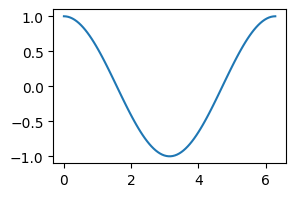

In [4]:
#gráfico com a função cosseno
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 2*np.pi, 100)
y = np.cos(x)
plt.figure(figsize=(3, 2))
plt.plot(x, y)
plt.show()

No entanto, podemos controlar a frequência da onda cosseno, multiplicando o argumento x por um valor constante. Por exemplo, para aumentar a frequência da onda cosseno, podemos multiplicar x por 2:

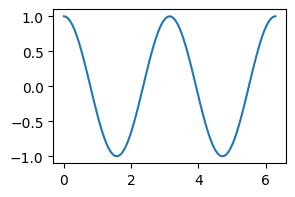

In [5]:
#gráfico com a função cosseno
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 2*np.pi, 100)
y = np.cos(2*x)
plt.figure(figsize=(3, 2))
plt.plot(x, y)
plt.show()

Da mesma forma, para diminuir a frequência da onda cosseno, podemos multiplicar x por 0.5:

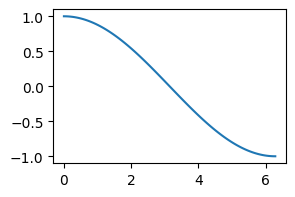

In [6]:
#gráfico com a função cosseno
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 2*np.pi, 100)
y = np.cos(0.5*x)
plt.figure(figsize=(3, 2))
plt.plot(x, y)
plt.show()

O que a DCT faz é transformar uma matriz de pixels de forma que eles sejam representados como uma combinação de ondas cossenos de diferentes frequências. Por exemplo, podemos combinar ondas cossenos de frequência 1 e 2, dando um peso para cada onda, de modo a representar formas mais complexas:

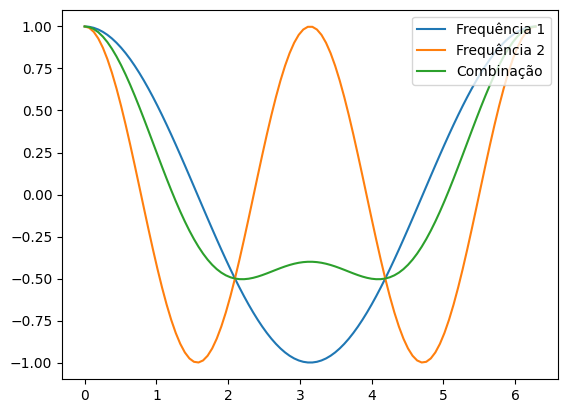

In [10]:
#gráfico com a função cosseno
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 2*np.pi, 100)
freq1 = np.cos(x)
freq2 = np.cos(2*x)
combinacao = freq1 * 0.7 + freq2 * 0.3
plt.plot(x, freq1, label='Frequência 1')
plt.plot(x, freq2, label='Frequência 2')
plt.plot(x, combinacao, label='Combinação')
#change legend position
plt.legend(loc='upper right')
plt.show()

A ideia é que quando uma imagem possui uma troca gradual de cor, a DCT consegue representar essa mudança com ondas de baixa frequência. Por outro lado, quando uma imagem possui muitas mudaças bruscas de cor, a DCT consegue representar essa mudança com ondas de alta frequência. Veja como as imagens abaixo podem ser representadas por ondas de baixa e alta frequência:

<img src="freq.jpeg" height=400 />

Matematicamente, é possível representar uma quantidade n de valores através da mesma quantidade n de ondas cossenos.

Em uma imagem, podemos fazer a DCT de cada linha e de cada coluna. O resultado é uma matriz de frequências de cossenos. Ou seja, podemos representar uma matriz de 8 x 8 pixels com uma matriz de 8 x 8 frequências de cossenos como a mostrada abaixo:

<img src="DCT-basis-functions.png" height=400 />

Onde cada elemento da matriz de frequências de cossenos é o peso de cada onda cosseno na representação da imagem original.

## Exercício 14

A DCT passa elementos da matriz $x$ para uma base de cossenos:

$y[k] = \sum_n x_n \cos( \frac{\pi}{N} (n + 0.5) k)$

Isso é equivalente a termos uma matriz $A_{N \times K}$ onde $a_{n,k} = \cos( \frac{\pi}{N} (n + 0.5) k)$, e então $y=Ax$. Veja com uma matriz 2x2:

$A_{2 \times 2} = 
\begin{bmatrix}
\cos\left(\frac{\pi}{2} (0 + 0.5) \cdot 0\right) & \cos\left(\frac{\pi}{2} (0 + 0.5) \cdot 1\right) \\
\cos\left(\frac{\pi}{2} (1 + 0.5) \cdot 0\right) & \cos\left(\frac{\pi}{2} (1 + 0.5) \cdot 1\right)
\end{bmatrix}
$

Matriz x (2x2):

$
x = \begin{bmatrix}
x_{1,1} & x_{1,2} \\
x_{2,1} & x_{2,2}
\end{bmatrix}
$

Resultado da Multiplicação \( y = Ax \) (2x2):

$y = \begin{bmatrix}
\bm{x_{1,1} \times \cos\left(\frac{\pi}{2} (0 + 0.5) \cdot 0\right) + x_{2,1} \times \cos\left(\frac{\pi}{2} (0 + 0.5) \cdot 1\right)} & 
x_{1,2} \times \cos\left(\frac{\pi}{2} (0 + 0.5) \cdot 0\right) + x_{2,2} \times \cos\left(\frac{\pi}{2} (0 + 0.5) \cdot 1\right) \\
x_{1,1} \times \cos\left(\frac{\pi}{2} (1 + 0.5) \cdot 0\right) + x_{2,1} \times \cos\left(\frac{\pi}{2} (1 + 0.5) \cdot 1\right) &
x_{1,2} \times \cos\left(\frac{\pi}{2} (1 + 0.5) \cdot 0\right) + x_{2,2} \times \cos\left(\frac{\pi}{2} (1 + 0.5) \cdot 1\right) \\
\end{bmatrix}$

**Nessas condições, quais são os vetores que constituem a base onde está o vetor $y$?**


## Exercício 15
*Objetivo: entender o que é uma `transformada 2D`*



Veja que, para transformar $x$ em $y$, aplicamos $A$ nas *colunas* de $x$. Mas, se estivéssemos representando nossas compras nas *linhas* de $x$, então teríamos que fazer a multiplicação na ordem inversa:

$y = xA^T$

Em algumas situações, os dados estão representados tanto nas linhas quanto nas colunas de $x$. Isso acontece, por exemplo, quando $x$ representa uma imagem. Nesse caso, precisamos pensar novamente como é esse processo de transformação.

Em uma imagem (em tons de cinza, isto é, sem canal de cor), as dimensões representam posições no espaço, isto é:

$x \in \mathbb{R}^ {\text{espaço} \times \text{espaço}}$

Quanto realizamos uma transformação, modificamos uma dessas dimensões:

$y = Ax \rightarrow y \in \mathbb{R}^{\text{outra coisa} \times \text{espaço}}$

E, da mesma forma, poderíamos encontrar:

$z = yA^T \rightarrow z \in \mathbb{R}^{\text{outra coisa} \times \text{outra coisa}}$

Isso significa que a transformação:

$z = AxA^T$

é, na verdade, uma aplicação da transformação $A$ tanto nas linhas quanto nas colunas de $x$.

Se a matriz $A$ for a matriz que faz a transformação DCT que vimos no exercício anterior, então temos:

$z \in \mathbb{R}^{\text{cossenos} \times \text{cossenos}}$

Em geral, quando temos bases compostas por cossenos de frequências diferentes, nos referimos a esse domínio como "frequência". Então, temos:

$z \in \mathbb{R}^{\text{frequência} \times \text{frequência}}$

1. Usando o código abaixo e o plot da matriz da DCT, responda: onde aparecem os "cossenos" da transformada?

In [19]:
import numpy  as np 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [20]:
def dct2d_matrix(M):
    # Definition: https://www.mathworks.com/help/images/discrete-cosine-transform.html
    T = np.zeros( (M,M) )
    for p in range(M):
        for q in range(M):
            if p==0:
                T[p,q] = 1/np.sqrt(M)
            else:
                T[p,q] = np.sqrt(2/M) * np.cos(np.pi*(2*q+1)*p/(2*M))
    return T

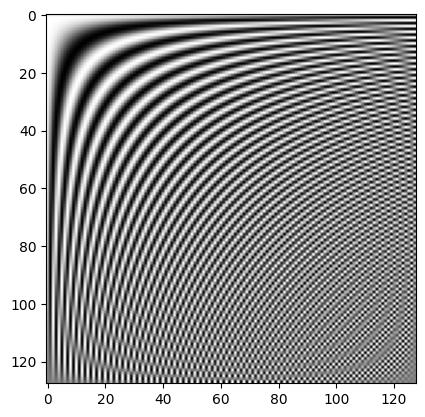

In [21]:
T = dct2d_matrix(M=128)
plt.figure()
plt.imshow(T, cmap='gray')
plt.show()

## Exercício 16
*Calcular a transformada DCT inversa*

O código abaixo calcula a DCT de uma imagem. Modifique o código abaixo para que a variável `C` receba o resultado de calcular a transformada DCT inversa de `B`, isto é, que `C` receba transformações realizadas em `B` que permitam recalcular `A`.  Para isso, leve em consideração que $T^T = T^{-1}$.

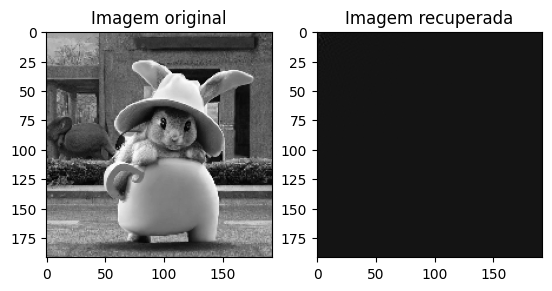

In [23]:
A = mpimg.imread("rabbit.jpeg").mean(axis=2)[::4,::4]
T = dct2d_matrix(M=A.shape[0])
B = T @ A @ T.T

C = B # Modifique isso - C deveria receber a transformada inversa de B

plt.subplot(1,2,1)
plt.title('Imagem original')
plt.imshow(A, cmap='gray')
plt.subplot(1,2,2)
plt.title('Imagem recuperada')
plt.imshow(C, cmap='gray')
plt.show()

## Exercício 17
*Objetivo: entender a característica de concentração de informação da DCT*

O código abaixo mostra um histograma dos valores da DCT de uma imagem ao lado do histograma de valores de cinza da imagem original.

1. Qual é o valor mais comum encontrado numa DCT?
1. Se usarmos o código de Huffman, quantos bits precisamos para codificar um valor que é muito mais comum que os outros?

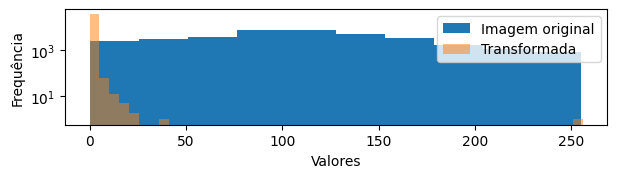

In [24]:
plt.figure(figsize=(7,1.5))
plt.hist(A.reshape( (-1,) ), bins=10, label='Imagem original')
plt.hist( 256*np.abs(B.reshape( (-1,) ))/np.max(np.abs(B)), bins=50, alpha=0.5, label='Transformada')
plt.semilogy()
plt.xlabel('Valores')
plt.ylabel('Frequência')
plt.legend()
plt.show()

## Exercício 18
*Objetivo: analisar o efeito de eliminar coeficientes da DCT*

O código abaixo elimina coeficientes da DCT que estão abaixo de um determinado valor.

1. Quantos coeficientes conseguimos eliminar da DCT sem que tenhamos distorções significativas na imagem?
1. Lembrando da distorção que tínhamos ao usar SVD para esse mesmo fim, qual das técnicas permite eliminar mais elementos ainda preservando, visualmente, a imagem?

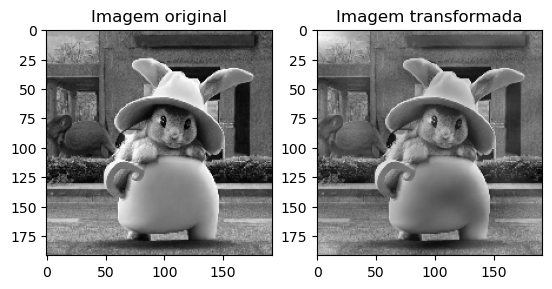

In [131]:
B = T @ A @ T.T
b = np.sort(B.reshape((-1,)))
B [ B<b[10] ] *= 0.0
A_ = T.T @ B @ T
plt.subplot(1,2,1)
plt.title('Imagem original')
plt.imshow(A, cmap='gray')
plt.subplot(1,2,2)
plt.title('Imagem transformada')
plt.imshow(A_, cmap='gray')
plt.show()

## Exercício 19
*Objetivo: realizar a filtragem da imagem em blocos*

Uma ideia para a aplicação da DCT para filtrar a imagem é aplicá-la em blocos de 8x8 pixels na imagem. Daí então, eliminamos coeficientes próximos da posição $(0,0)$ da matriz transformada aplicando uma máscara multiplicativa, e retornamos a imagem para o domínio original.

1. Quantos coeficientes conseguimos eliminar sem alterar significativamente o conteúdo da imagem?
1. Usando um código de Huffman, quanta compressão podemos conseguir para a DCT mascarada de nossa imagem?

[[1. 1. 1. 1. 0. 0. 0. 0.]
 [1. 1. 1. 0. 0. 0. 0. 0.]
 [1. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]
Porcentagem de frequências mantidas:  0.15625


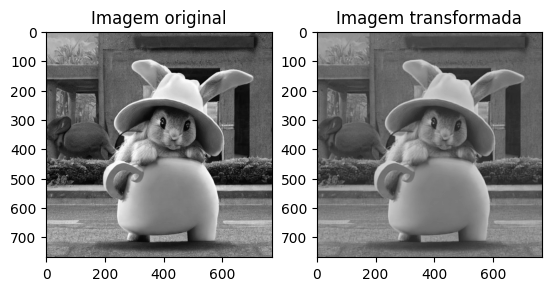

In [33]:
limite = 3
mascara = np.zeros( (8,8) )
for i in range(8):
    for j in range(8):
        if i+j<=limite:
            mascara[i,j] = 1.0

print(mascara)

print("Porcentagem de frequências mantidas: ",np.sum(mascara==1)/ (mascara.shape[0]*mascara.shape[1]))

A = mpimg.imread("rabbit.jpeg").mean(axis=2)

def compressao_bloco_8(imagem, mascara):
    T = dct2d_matrix(M=8)
    A_target = np.zeros(A.shape)
    for i in range(0, imagem.shape[0], 8):
        for j in range(0, imagem.shape[1], 8):
            B = T @ A[i:i+8, j:j+8] @ T.T
            B *= mascara
            A_target[i:i+8, j:j+8] = T.T @ B @ T
    return A_target

A_comprimido = compressao_bloco_8(A, mascara)

plt.subplot(1,2,1)
plt.title('Imagem original')
plt.imshow(A, cmap='gray')
plt.subplot(1,2,2)
plt.title('Imagem transformada')
plt.imshow(A_comprimido, cmap='gray')
plt.show()

## Exercício 20
*Objetivo: explicar a compressão por DCT usando conceitos de álgebra linear*

Explique como cada um dos conceitos abaixo é usado no processo de compressão de imagens:

1. Multiplicação de matrizes
1. Matriz transposta
1. Mudança de base
1. Matriz inversa
1. Entropia



# Projeto

Neste projeto, vamos usar o conceito de entropia e tudo o que analisamos até o momento para fazer um jogador de forca.

1. Vamos instanciar uma classe JogodeForca, que defini logo abaixo. As regras estão no próprio código para não serem ambíguas.
1. O vocabulário permitido é o que está na URL `https://www.ime.usp.br/~pf/dicios/br-sem-acentos.txt`, e o jogador pode ter acesso a esse vocabulário.
1. O objetivo da atividade é fazer um jogador automático de forca que ganha o máximo de vezes possível com apenas 5 vidas.
1. Ao criar um novo jogo, o jogador recebe a informação de quantas letras a palavra tem.
1. Em uma jogada típica, o jogador escolhe uma letra. O "juiz" retorna ua lista com os índices em que essa letra aparece na palavra secreta. Se a letra não aparece, retorna uma lista vazia e o jogador perde uma vida.
1. A qualquer momento, o jogador pode consultar suas vidas (`jogo.vidas`), mas, obviamente, não pode consultar a palavra escolhida.
1. O jogador ganha quando, por saber qual palavra foi escolhida, usa o método `tentar_palavra` informando a palavra correta. Se usar o método mas não acertar, perde o jogo imediatamente.
1. Sempre que o jogador ganha o juiz retorna `True`. Quando ele perde, retorna `False`.


In [35]:
import random
class JogoDeForca:
    def __init__(self):
        import requests
        url = 'https://www.ime.usp.br/~pf/dicios/br-sem-acentos.txt'
        r = requests.get(url, allow_redirects=True)
        if r.status_code==200:
            self.content = str(r.content.decode()).split('\n')
        else:
            print("Erro: ", r.status_code)
    
    def novo_jogo(self, vidas=5):
        self.vidas = vidas
        self.palavra = random.choice(self.content)
        return len(self.palavra)

    def tentar_letra(self, letra):
        if self.vidas > 0:
            if letra in self.palavra:
                return [idx for idx in range(len(self.palavra)) if self.palavra[idx]==letra]
            else:
                self.vidas -= 1
                if self.vidas == 0:
                    print("Fim de jogo!")
                    return False
                else:
                    return []
        
    def tentar_palavra(self, palavra):
        if self.vidas > 0:
            if self.palavra == palavra:
                print ("Ganhou!")
                return True
            else:
                self.vidas = 0
                print("Fim de jogo!")
                return False

In [36]:
jogo = JogoDeForca()
print(jogo.novo_jogo())
print(jogo.palavra)
print(jogo.vidas)

12
contrafariam
5


In [38]:
print(jogo.tentar_letra('b'))
print(jogo.tentar_letra('a'))
print(jogo.tentar_letra('w'))
print(jogo.vidas)

[]
[5, 7, 10]
[]
1


## Descrição do projeto

Neste projeto, o grupo deverá projetar e avaliar um jogador de forca. Em sua avaliação, deve executar um número grande de jogos diferentes (no mínimo 100) e então reportar a probabilidade de seu algoritmo vencer o jogo.

Anotações importantes:

1. O grupo deve enviar um link para o repositório GitHub onde está localizado o projeto.
2. No diretório principal do repositório, deve haver um *notebook* comentado `demo.ipynb`, que, quando executado, executa todos os testes que geram os resultados alcançados.
3. Embora haja muitas maneiras de realizar este algoritmo, é obrigatório que sua solução se baseie em conceitos que aprendemos sobre álgebra linear e teoria da informação, isto é, uma ideia que venha deste curso deve obrigatoriamente se o componente central de seu algoritmo.

**ENTREGAS**
* Link para o repositório onde está o projeto.
* No `README.md` do repositório, deve haver um resumo, com até 400 palavras, explicando qual foi a ideia implementada e como o conceito utilizado (que deve obrigatoriamente vir do nosso curso de álgebra linear e teoria da informação) foi usado para resolver o problema.
* O `demo.ipynb` deve estar comentado, célula a célula, em Markdown, explicando em linguagem natural a importância de cada passo e comentanto os resultados da execução de cada célula.
* O `demo.ipynb` deve ser colocado no repositório já executado, isto é, com todos os dados já gerados, de forma que seja possível visualizá-lo inteiramente sem executar as células.
* Importante: seu algoritmo não precisa ganhar sempre, e esta não é uma competição sobre "quem ganha mais". A avaliação está ligada a como você fez a conexão entre a ideia e a solução.

**RUBRICA**

O projeto será avaliado usando três rubricas. [Duas delas dizem respeito à redação e ao código apresentado](rubricas.md), e são compartilhados por todos os projetos. Em especial, a rubrica de *argumentação* será aplicada ao conjundo do `README.md` e das células em markdown do `demo.ipynb`. Este projeto tem ainda requisitos específicos que estão na rubrica abaixo. Os níveis são cumulativos, isto é, para passar de um nível, *todos* os requisitos dele devem ser cumpridos. A nota final é baseada na rubrica em que o trabalho obtiver o *menor* desempenho. As rubricas foram inspiradas nos níveis da [Taxonomia de Bloom](https://cft.vanderbilt.edu/guides-sub-pages/blooms-taxonomy/).

| Nível | Descrição | [Tax. de Bloom](https://cft.vanderbilt.edu/guides-sub-pages/blooms-taxonomy/) |
| --- | --- | --- |
| F | Não entregue, entregue sem completar o `README.md`, entregue sem o `demo.ipynb`, entregue sem resolver o problema que foi proposto, ou entregue sem usar claramente um conceito que venha do curso de álgebra linear/teoria da informação.  | Não fez |
| E | Entregue, com erros metodológicos graves, como usar um conceito que não tem nenhuma conexão com o problema ou implementá-lo de forma equivocada | Entender |
| D | O projeto tem erros na avaliação de desempenho ou deixa de conectar corretamente e sem equívocos o conceito utilizado à solução proposta. | Compreender |
| B | O projeto avalia corretamente jogador, mas não analisa os principais casos de erros. | Aplicar |
| A | O jogador foi avaliado corretamente, e os principais casos de erro foram explicitados, isto é, o grupo mostra como fazer seu jogador "falhar" e a justificativa dessas falhas. | Analisar |